In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saifgebreel","key":"d5a6b442eedf12fbc44ef3ffc2334d88"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  4 22:16 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle 

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          25762        713  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           1202         36  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           3848         82  1.0              
mohithsairamreddy/salary-data 

In [ ]:
! kaggle datasets download -d jangedoo/utkface-new

100% 330M/331M [00:15<00:00, 24.2MB/s]
100% 331M/331M [00:15<00:00, 22.0MB/s]


In [ ]:
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

# **Code Part**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [ ]:
path = Path("/content/UTKFace/")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [ ]:
print(len(filenames))
print(filenames[:3])

23708
['53_0_0_20170120223133507.jpg.chip.jpg', '17_1_0_20170117140619087.jpg.chip.jpg', '32_0_3_20170119200348476.jpg.chip.jpg']


# Data preprocessing

Data I have downloaded is composed of 23,708 images with age and gender in the Image Name. For Example, 1_0_0_239389.JPG image means that age is 1, gender is 0 (male) and 0 refers to the race (not needed in this task).
So I split the image name on ' _ ' so I can get separated age and gender with image.
Also, I have shuffle all the images

In [ ]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [ ]:
image_path

['30_0_0_20170116221914812.jpg.chip.jpg',
 '45_0_0_20170120221844935.jpg.chip.jpg',
 '40_0_0_20170116224749117.jpg.chip.jpg',
 '38_0_1_20170113173111601.jpg.chip.jpg',
 '4_1_0_20170109192424440.jpg.chip.jpg',
 '36_0_2_20170105163358596.jpg.chip.jpg',
 '56_0_1_20170111211502304.jpg.chip.jpg',
 '70_0_0_20170119205821287.jpg.chip.jpg',
 '22_1_4_20170103233803763.jpg.chip.jpg',
 '45_0_3_20170116201111523.jpg.chip.jpg',
 '24_1_4_20170103224348784.jpg.chip.jpg',
 '3_1_2_20161219211602774.jpg.chip.jpg',
 '24_1_3_20170119165918215.jpg.chip.jpg',
 '26_1_2_20170116180506806.jpg.chip.jpg',
 '60_0_3_20170119205804806.jpg.chip.jpg',
 '5_1_4_20161223230106795.jpg.chip.jpg',
 '3_1_4_20161221193402694.jpg.chip.jpg',
 '58_0_3_20170119211701065.jpg.chip.jpg',
 '45_0_2_20170117153932735.jpg.chip.jpg',
 '82_1_0_20170109150955073.jpg.chip.jpg',
 '36_0_3_20170119180411476.jpg.chip.jpg',
 '25_0_1_20170116002254660.jpg.chip.jpg',
 '38_0_4_20170109011128798.jpg.chip.jpg',
 '31_1_0_20170104235124347.jpg.chip.jp

# From Unstructured data to Structured data

In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [ ]:
df.head()

,image,age,gender
0,30_0_0_20170116221914812.jpg.chip.jpg,30,0
1,45_0_0_20170120221844935.jpg.chip.jpg,45,0
2,40_0_0_20170116224749117.jpg.chip.jpg,40,0
3,38_0_1_20170113173111601.jpg.chip.jpg,38,0
4,4_1_0_20170109192424440.jpg.chip.jpg,4,1


In [ ]:
gender_dict = {0:"Male",1:"Female"}

In [ ]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [ ]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


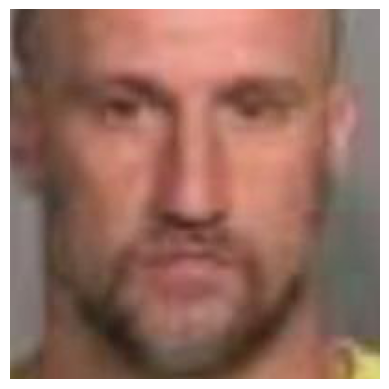

In [ ]:
from PIL import Image
img = Image.open("UTKFace/"+df.image[1])
plt.axis('off')
plt.imshow(img);

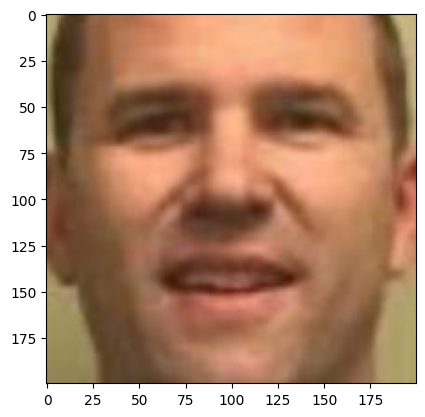

In [ ]:
img = Image.open("UTKFace/"+df.image[2])
plt.imshow(img)

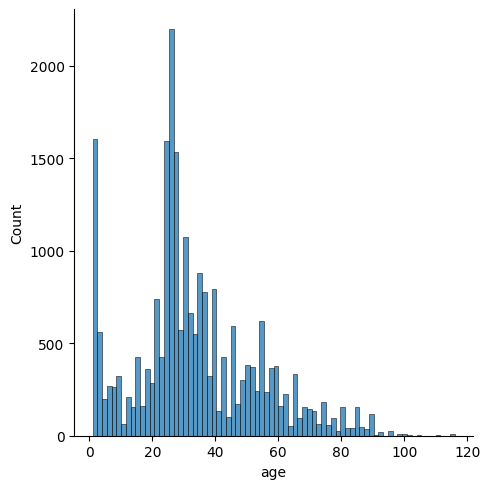

In [ ]:
sns.displot(df.age)

<Axes: xlabel='gender', ylabel='count'>

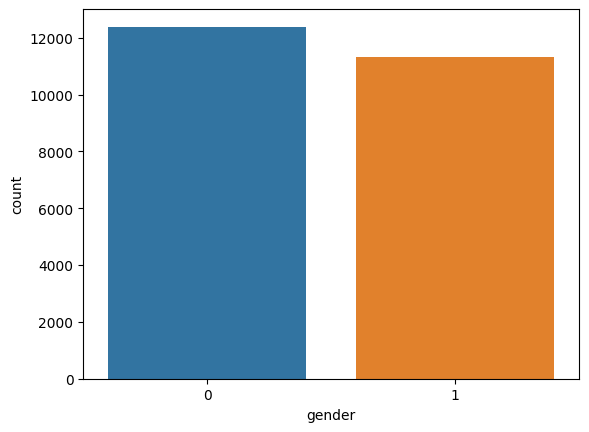

In [ ]:
sns.countplot(data = df,x = 'gender')

# Plotting Images

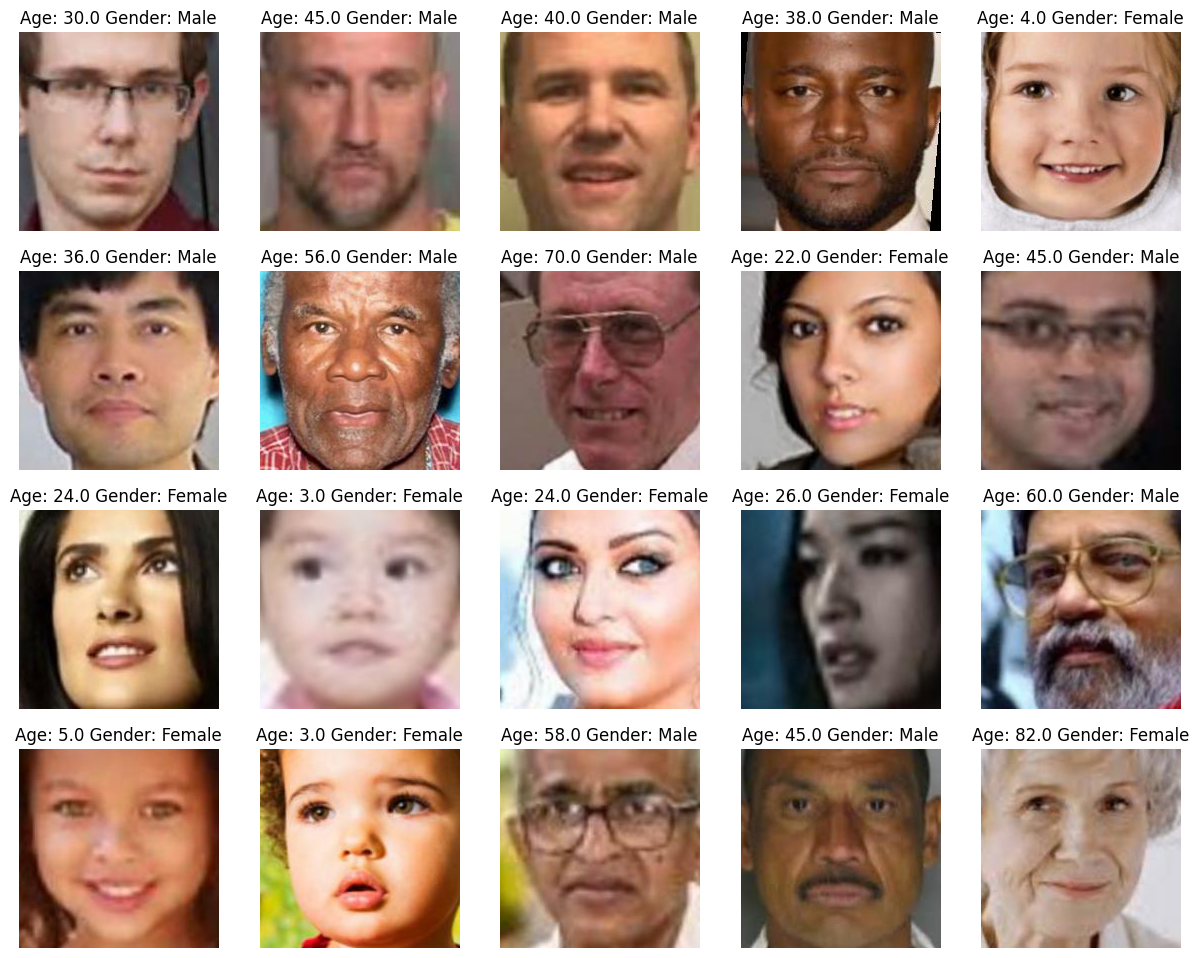

In [ ]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
train, test = train_test_split(df, test_size=0.20, random_state=42)

In [ ]:
train.head()

,image,age,gender
5096,9_0_1_20170110224349623.jpg.chip.jpg,9.0,0
19586,22_1_4_20170104005431327.jpg.chip.jpg,22.0,1
9835,90_0_2_20170111223901221.jpg.chip.jpg,90.0,0
13631,65_1_0_20170110152931044.jpg.chip.jpg,65.0,1
9807,19_1_0_20170116212113630.jpg.chip.jpg,19.0,1


# Extracting Features

In [ ]:
#converting Image to numpy array (extracting feature)
x_train = []
for file in train.image:
    img = load_img("UTKFace/"+file, color_mode = "grayscale")
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

In [ ]:
x_train.shape

(18966, 128, 128, 1)

# Normalizing data

In [ ]:
x_train = x_train/255.0

In [ ]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [ ]:
input_size = (128,128,1)

# Creating model

Using Convolutional Neural Network but with skip connections. Skip connections are used in Residual NN but I have implemented CNN with little Skip connections (shortcut). 

In [ ]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [ ]:
model.compile(loss=['binary_crossentropy','mean_absolute_error'], optimizer='adam', metrics=['accuracy','mae'])

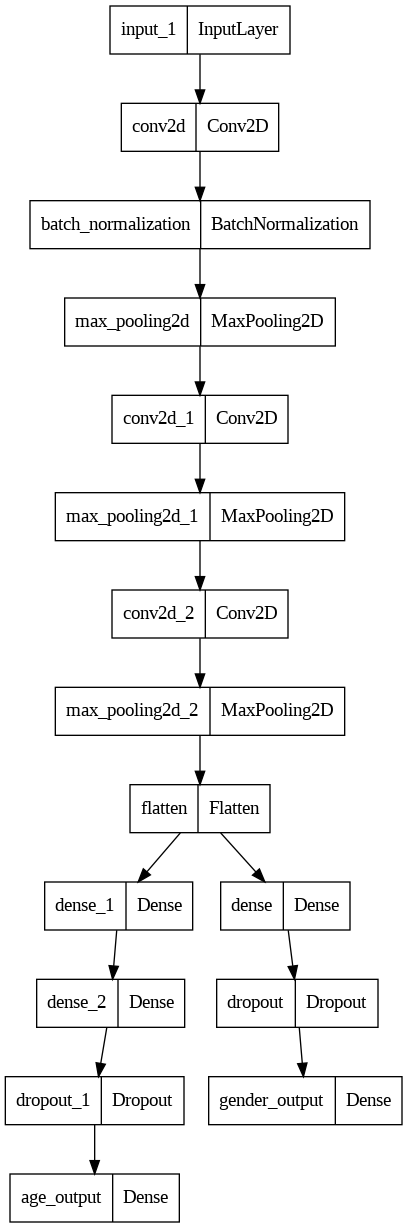

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath = "Age&GenderDetect.hdf5"

# Create a ModelCheckpoint to save the model
checkpoint = ModelCheckpoint(
    filepath= filepath, monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)


# Create an EarlyStopping callback to stop the training when the validation loss stops improving
earlyStop =  EarlyStopping(
    # Monitor the validation loss
    monitor='val_loss', 
    
    # Minimize the validation loss
    mode='min', 
    
    
    patience=30
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=10, verbose=1)


# Combine the callbacks into a list
callbacks_list = [earlyStop, checkpoint, reduce_lr]

# Training the model

In [ ]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 128, epochs=100, validation_split= 0.2, callbacks = callbacks_list)

Epoch 1/100
119/119 [==============================] - ETA: 0s - loss: 14.0974 - gender_output_loss: 0.6893 - age_output_loss: 13.4081 - gender_output_accuracy: 0.6836 - gender_output_mae: 0.4123 - age_output_accuracy: 0.0427 - age_output_mae: 13.4081
Epoch 1: val_loss improved from inf to 29.68841, saving model to Age&GenderDetect.hdf5
119/119 [==============================] - 29s 131ms/step - loss: 14.0974 - gender_output_loss: 0.6893 - age_output_loss: 13.4081 - gender_output_accuracy: 0.6836 - gender_output_mae: 0.4123 - age_output_accuracy: 0.0427 - age_output_mae: 13.4081 - val_loss: 29.6884 - val_gender_output_loss: 0.6631 - val_age_output_loss: 29.0253 - val_gender_output_accuracy: 0.7617 - val_gender_output_mae: 0.4843 - val_age_output_accuracy: 0.0469 - val_age_output_mae: 29.0253 - lr: 0.0010
Epoch 2/100
119/119 [==============================] - ETA: 0s - loss: 10.3517 - gender_output_loss: 0.4384 - age_output_loss: 9.9133 - gender_output_accuracy: 0.7959 - gender_output_m

# Visualizing loss

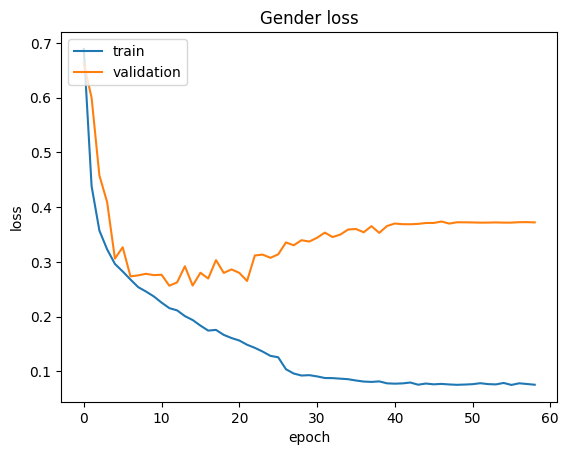

In [ ]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

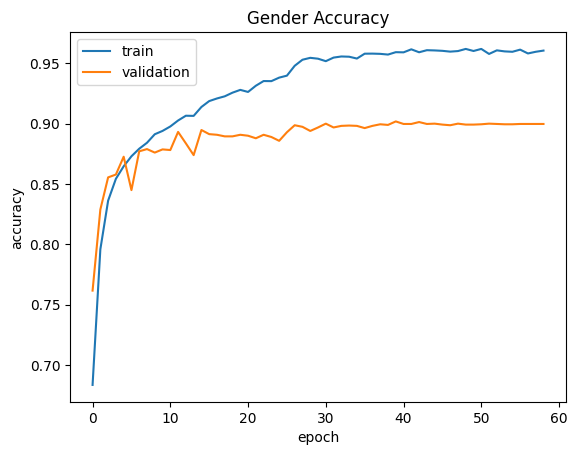

In [ ]:
plt.plot(model_history.history['gender_output_accuracy'])
plt.plot(model_history.history['val_gender_output_accuracy'])
plt.title('Gender Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

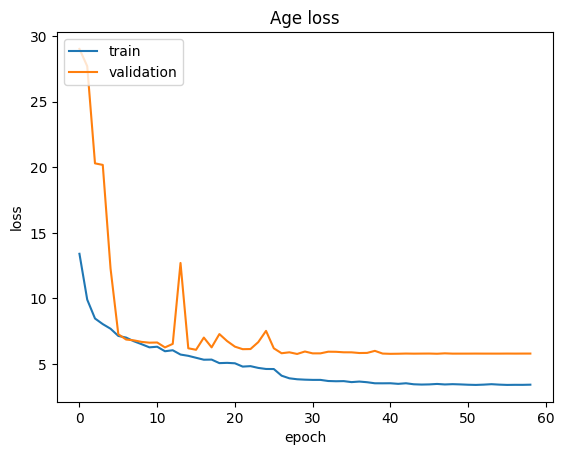

In [ ]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

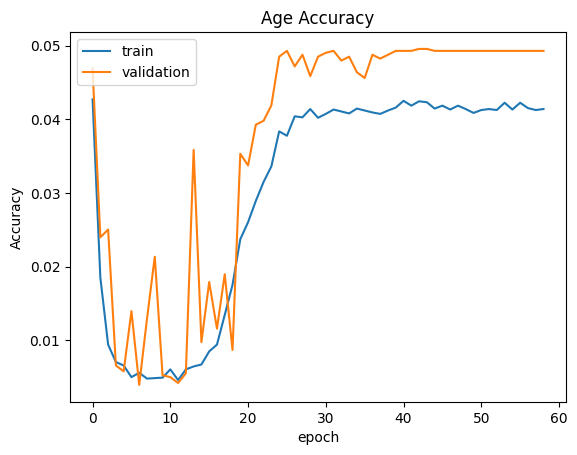

In [ ]:
plt.plot(model_history.history['age_output_accuracy'])
plt.plot(model_history.history['val_age_output_accuracy'])
plt.title('Age Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_history.model.evaluate(x_train, [y_gender, y_age])

593/593 [==============================] - 6s 9ms/step - loss: 2.6356 - gender_output_loss: 0.1106 - age_output_loss: 2.5250 - gender_output_accuracy: 0.9659 - gender_output_mae: 0.0499 - age_output_accuracy: 0.0439 - age_output_mae: 2.5250


[2.6356332302093506,
 0.1106138527393341,
 2.525020122528076,
 0.9658862948417664,
 0.04985472559928894,
 0.04386797547340393,
 2.525020122528076]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
y_gender_pred = np.argmax(model.predict(x_train))

593/593 [==============================] - 4s 7ms/step


In [ ]:
y_gender.shape

(18966,)

In [ ]:
y_gender_true = np.argmax(y_gender)

In [ ]:
def measures(y_train, y_test, y_train_hat, y_test_hat):
    print('Train performance')
    print('-------------------------------------------------------')
    print(classification_report(y_train, y_train_hat))

    print('Test performance')
    print('-------------------------------------------------------')
    print(classification_report(y_test, y_test_hat))

    print('Roc_auc score')
    print('-------------------------------------------------------')
    print(roc_auc_score(y_test, y_test_hat))
    print('')

    print('Confusion matrix')
    print('-------------------------------------------------------')
    cm = confusion_matrix(y_test, y_test_hat)
    print(cm)
    sns.heatmap(cm, annot=True, cmap='Blues')

# Predicting test image

Original: Gender =  Male  Age =  45.0
1/1 [==============================] - 0s 106ms/step
Prediction: Gender =  Male  Age =  42


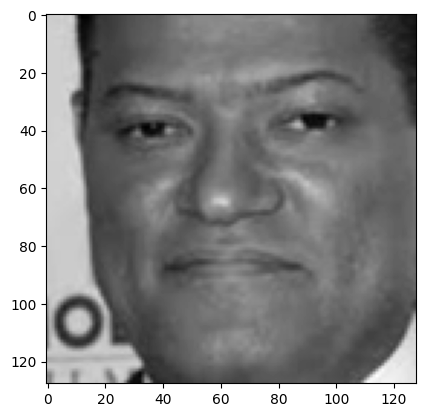

In [ ]:
index=77
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Female  Age =  34.0
1/1 [==============================] - 0s 21ms/step
Prediction: Gender =  Female  Age =  32


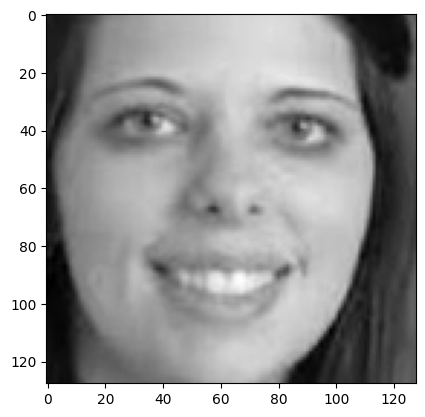

In [ ]:
index=25
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')